In [126]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Importing the Datasets into the Dataframes

In [127]:
df = pd.read_csv("Analysis of Super Store - DA.csv")

To Understand the Dataset and get more Insights on the data, I have printed the first five rows or first five entries and also describe the Dataframe

In [128]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [129]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [131]:
df.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### As the column Postal Code has no significance, we drop the column.

In [132]:
df.drop(df.columns[[5]], axis = 1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [133]:
df.head()
df.shape

(9994, 13)

#### Lets start with the regions and their respective profits. This will give us which region is not making more profits compared to the others.

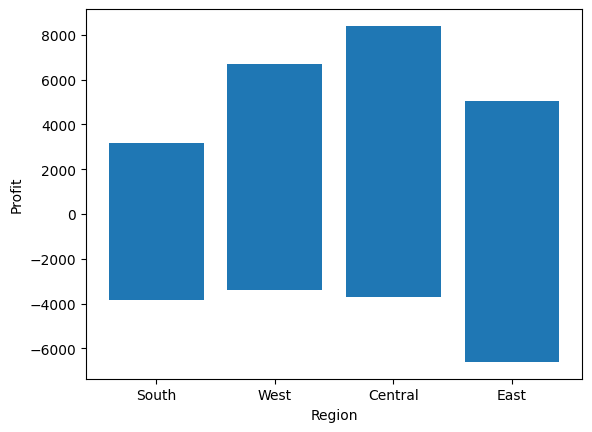

In [134]:
plt.bar(df['Region'], df['Profit'])

plt.xlabel('Region')
plt.ylabel('Profit')

plt.show()

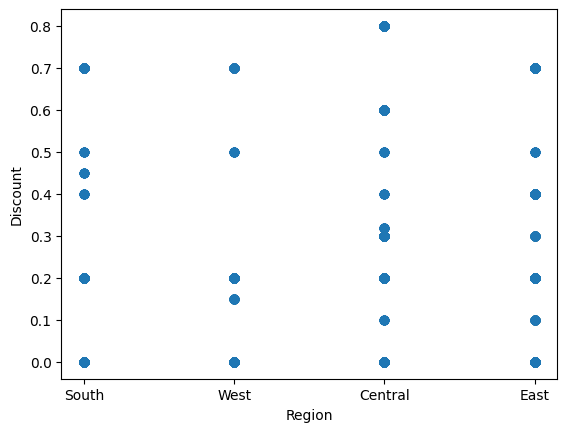

In [135]:
plt.scatter(df['Region'], df['Discount'])

plt.xlabel('Region')
plt.ylabel('Discount')

plt.show()

In [136]:
df.groupby(['Region', 'Category'])['Sales'].sum()

Region   Category       
Central  Furniture          163797.1638
         Office Supplies    167026.4150
         Technology         170416.3120
East     Furniture          208291.2040
         Office Supplies    205516.0550
         Technology         264973.9810
South    Furniture          117298.6840
         Office Supplies    125651.3130
         Technology         148771.9080
West     Furniture          252612.7435
         Office Supplies    220853.2490
         Technology         251991.8320
Name: Sales, dtype: float64

In [114]:
df.groupby(['Ship Mode', 'Region'])['Category'].count()

Ship Mode       Region 
First Class     Central     197
                East        394
                South       200
                West        454
Same Day        Central      85
                East        122
                South        72
                West        166
Second Class    Central     332
                East        433
                South       292
                West        581
Standard Class  Central     968
                East       1346
                South       797
                West       1684
Name: Category, dtype: int64

In [125]:
south_data = df[df['Region'] == 'South']

average_discount_by_category = south_data.groupby('Category')['Discount'].mean()

category_with_min_discount = average_discount_by_category.idxmin()
category_with_min_discount


'Office Supplies'

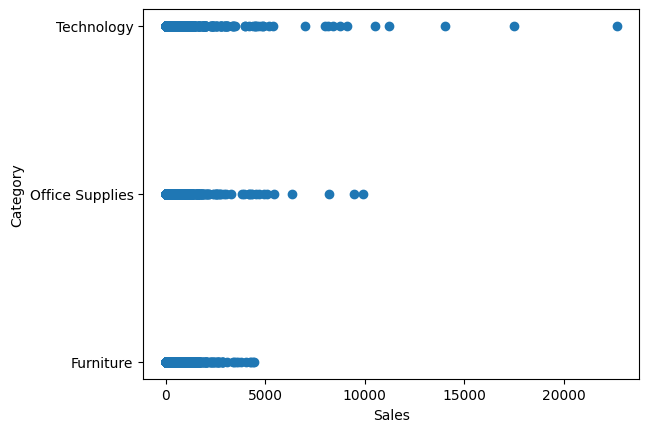

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(df['Sales'], df['Category'])

# Add labels to the axes
plt.xlabel('Sales')
plt.ylabel('Category')

# Show the plot
plt.show()

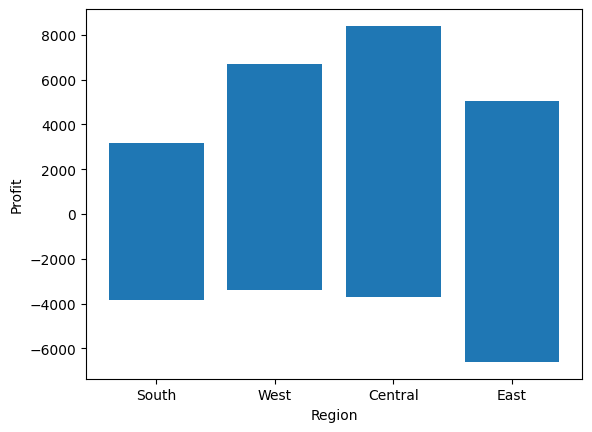

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.bar(df['Region'], df['Profit'])

# Add labels to the axes
plt.xlabel('Region')
plt.ylabel('Profit')

# Show the plot
plt.show()

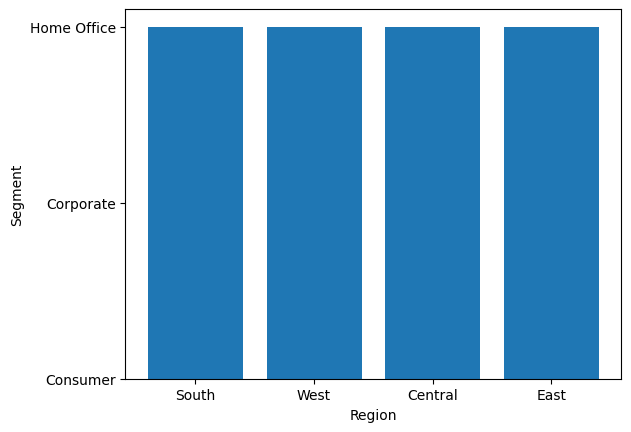

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.bar(df['Region'], df['Segment'])

# Add labels to the axes
plt.xlabel('Region')
plt.ylabel('Segment')

# Show the plot
plt.show()

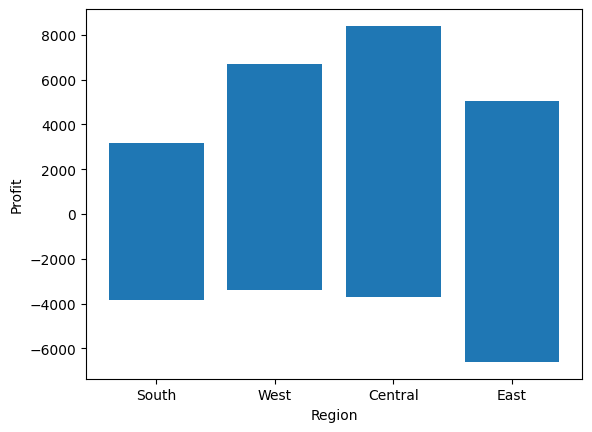

In [24]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.bar(df['Region'], df['Profit'])

# Add labels to the axes
plt.xlabel('Region')
plt.ylabel('Profit')

# Show the plot
plt.show()

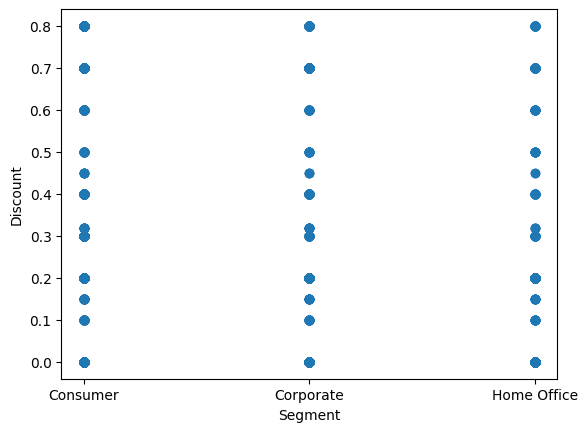

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(df['Segment'], df['Discount'])

# Add labels to the axes
plt.xlabel('Segment')
plt.ylabel('Discount')

# Show the plot
plt.show()

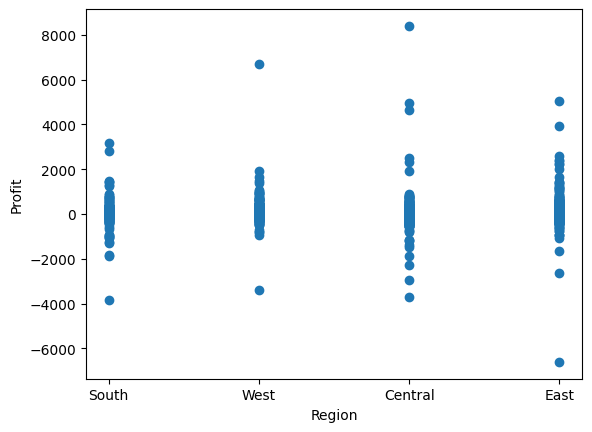

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(df['Region'], df['Profit'])

# Add labels to the axes
plt.xlabel('Region')
plt.ylabel('Profit')

# Show the plot
plt.show()

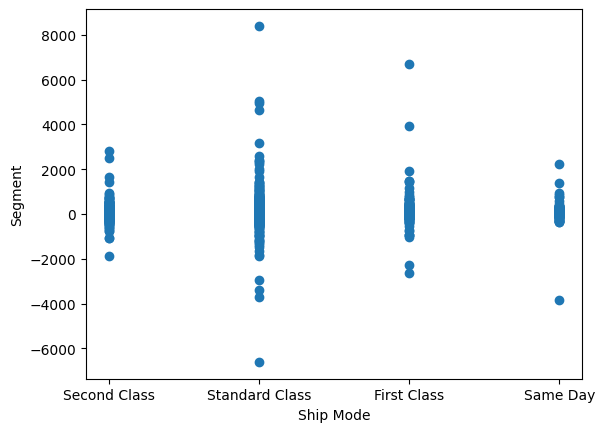

In [27]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(df['Ship Mode'], df['Profit'])

# Add labels to the axes
plt.xlabel('Ship Mode')
plt.ylabel('Segment')

# Show the plot
plt.show()

In [28]:
max(df["Ship Mode"])

'Standard Class'

In [29]:
import pandas as pd


# Find the category that uses the standard class
category = df[df['Ship Mode'] == 'Standard Class']['Segment'].unique()[0]

# Print the category
print(category)

Consumer


In [30]:
import pandas as pd


# Find the category that uses the standard class
category = df[df['Ship Mode'] == 'Standard Class']['Segment'].unique()[0]

# Print the category
print(category)

Consumer


In [31]:
# Group by column Category and pro
df3 = df[(df["Segment"] == "Home Office") & (df["Region"] == "East")]
df3.shape

(502, 13)

Consumer East 1469, 13
Corporate Segment 0, 13
Home Office 502, 13





In [32]:
max(df["Region"])

'West'

In [33]:
max(df["Sub-Category"])

'Tables'

In [34]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


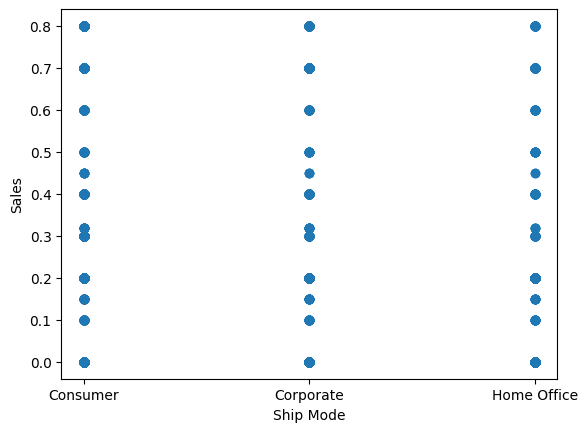

In [35]:
# Create a scatter plot of the data
plt.scatter(df['Segment'], df['Discount'])

# Add labels to the axes
plt.xlabel('Ship Mode')
plt.ylabel('Sales')

# Show the plot
plt.show()


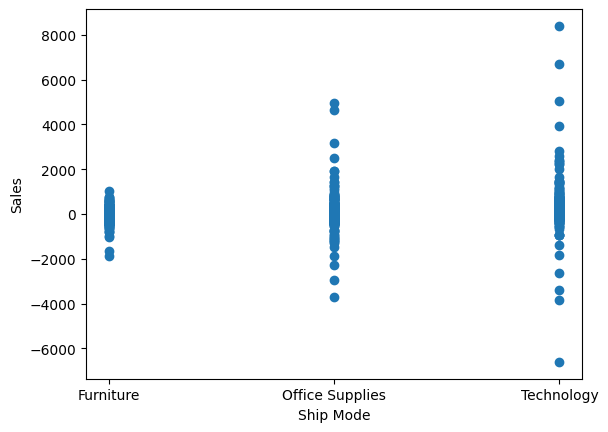

In [37]:
plt.scatter(df['Category'], df['Profit'])

# Add labels to the axes
plt.xlabel('Ship Mode')
plt.ylabel('Sales')

# Show the plot
plt.show()

In [38]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [50]:
df.groupby("Region")["Sales"].sum()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [61]:
df.groupby("Region")["Profit"].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

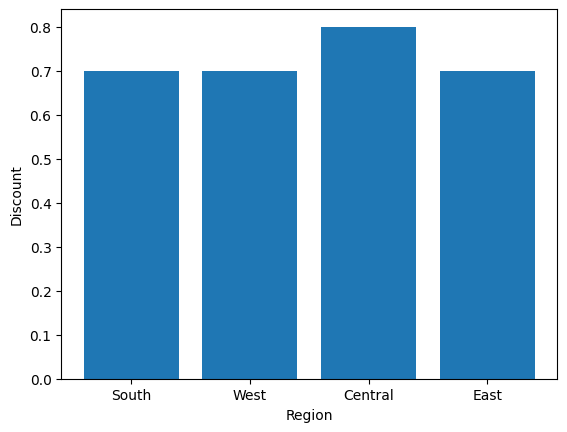

In [52]:
plt.bar(df["Region"], df["Discount"])
plt.xlabel("Region")
plt.ylabel("Discount")
plt.show()

In [60]:
df.groupby("Region")["Sub-Category"].max()


Region
Central    Tables
East       Tables
South      Tables
West       Tables
Name: Sub-Category, dtype: object